In [227]:
import matplotlib.pyplot as plt
import numpy as np
class KalmanFilter:
    def __init__(self, int_x, int_p):
        self.x=int_x
        self.A=1
        self.H=1
        self.q=2e2
        self.r=2e2
        self.p=int_p
        self.gain=0

    def filter(self, z_measure):
        self.x=self.A*self.x
        self.p=self.A*self.A*self.p+self.q
        self.gain=self.p*self.H/(self.p*self.H*self.H+self.r)
        self.x=self.x+self.gain*(z_measure-self.H*self.x)
        self.p=(1-self.gain*self.H)*self.p
        return self.x

class lowPassFilter:
    def __init__(self, int_x, alpha):
        self.x=int_x
        self.A=alpha

    def filter(self, data):
        self.x=self.A*data+(1-self.A)*self.x
        return self.x
    
class FIRFilter:
    def __init__(self, filter_order,cutoff_frequency ,nyquist_rate):
        # 设计FIR滤波器系数
        coefficients = np.sinc(2 * cutoff_frequency * (np.arange(filter_order) - (filter_order - 1) / 2))

        # 对系数进行窗口函数处理
        window = np.hamming(filter_order)
        coefficients *= window

        # 归一化系数
        coefficients /= np.sum(coefficients)
        self.coefficients = coefficients
        self.buffer = []

    def filter(self, data_point):
        # 如果缓冲区已满，则移除最早的数据
        if len(self.buffer) >= len(self.coefficients):
            self.buffer.pop(0)
        
        # 将新的数据点添加到缓冲区
        self.buffer.append(data_point)
        
        # 计算滤波后的输出
        output = sum(coeff * data for coeff, data in zip(self.coefficients, self.buffer))
        
        return output
class MovingAverageFilter:
    def __init__(self, window_size):
        self.window_size = window_size
        self.buffer = []

    def filter(self, data_point):
        # 将新的数据点添加到缓冲区
        self.buffer.append(data_point)
        
        # 如果缓冲区已满，则移除最早的数据
        if len(self.buffer) > self.window_size:
            self.buffer.pop(0)
        
        # 计算滤波后的输出
        output = np.mean(self.buffer)
        
        return output

In [228]:
def kf(text:str,chushu:int) -> None:
    kalman_data = []
    kalman_filter_data = []
    lowPassFilter_data=[]
    FIRFilter_data=[]
    MovingAverageFilter_data=[]
    # 读取文件内容
    with open(text, 'r') as file:
        for line in file:
            # 提取第一列的数字
            columns = line.strip().split()
            # 提取小数部分
            first_column_value = float(columns[0])/chushu*100
            kalman_data.append(first_column_value )
    kalman = KalmanFilter(kalman_data[0], 200)
    lowpass=lowPassFilter(kalman_data[0],0.2)
    frifilter=FIRFilter(5,0.2,0.5)
    moving=MovingAverageFilter(5)
    for z in kalman_data:
        kalman_filter_data.append(kalman.filter(z))
        lowPassFilter_data.append(lowpass.filter(z))
        FIRFilter_data.append(frifilter.filter(z))
        MovingAverageFilter_data.append(moving.filter(z))
    indices = range(len(kalman_data))
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 用黑体显示中文
    plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
    plt.figure(figsize=(8, 6))
    plt.plot(FIRFilter_data, label='有限脉冲响应滤波器滤波器', linewidth=1, color=tuple(x / 255.0 for x in (200, 200, 200)))
    plt.plot(MovingAverageFilter_data, label='平均滤波器', linewidth=1, color=tuple(x / 255.0 for x in (150, 150, 150)))
    plt.plot(lowPassFilter_data, label='低通滤波器', linewidth=1, color='blue')
    plt.plot(kalman_filter_data, label='卡尔曼滤波器', linewidth=1, color=tuple(x / 255.0 for x in (117, 226, 133)))
    plt.scatter(indices, kalman_data, label='原数据', color='red', s=3, marker='^')
    plt.legend()
    plt.savefig(text[:-4]+'_滤波结果.png', dpi=500)
    plt.show()


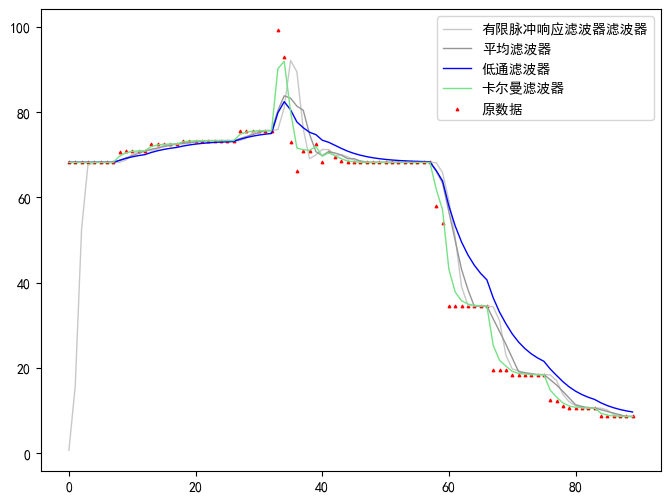

In [229]:
kf('result.txt',255)

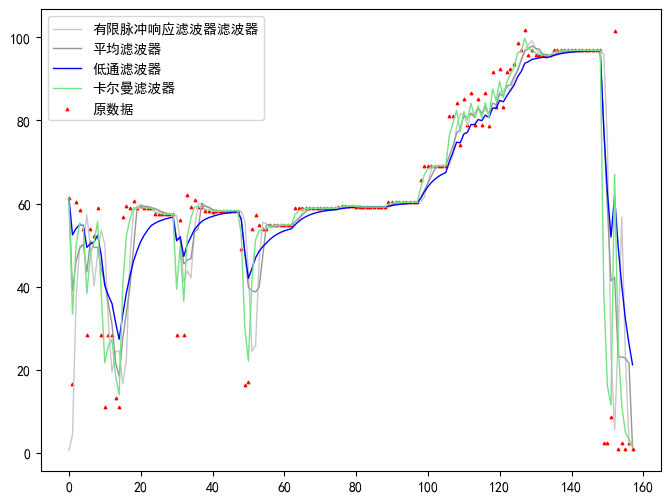

In [230]:
kf('data.txt',350)